In [1]:
import mysql.connector
import pandas as pd

class DBManager :
    
    def __init__(self, host, port, user, password, database):
        self.host = host
        self.port = port
        self.user = user
        self.password = password
        self.database = database
        self.db = mysql.connector.connect(
            host=host,
            port=port,
            user=user,
            password=password,
            database=database
        )
        self.cursor = self.db.cursor(buffered=True)
        print("DB connected")

    def close(self):
        if self.cursor:
            self.cursor.close()
        if self.db:
            self.db.close()
        print("DB disconnected")

    def select_all(self, table):
        sql = f"SELECT * FROM {table}"
        self.cursor.execute(sql)
        result = self.cursor.fetchall()
        columns = [col[0] for col in self.cursor.description]
        df = pd.DataFrame(result, columns=columns).reset_index(drop=True)
        return df

    def execute(self, sql):
        self.cursor.execute(sql)
        self.db.commit()
        print("------------------------------------------")
        print("EXECUTED")
        if self.cursor.description is not None:
            result = self.cursor.fetchall()
            print(result)
        return True
    
dbm = DBManager(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    port= 3306,
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)


DB connected


In [4]:
df = dbm.select_all("rental_holiday_summary")
df.head()

,day_type,avg_rental_count
0,Weekday,129336.3321
1,Holiday,102472.5385


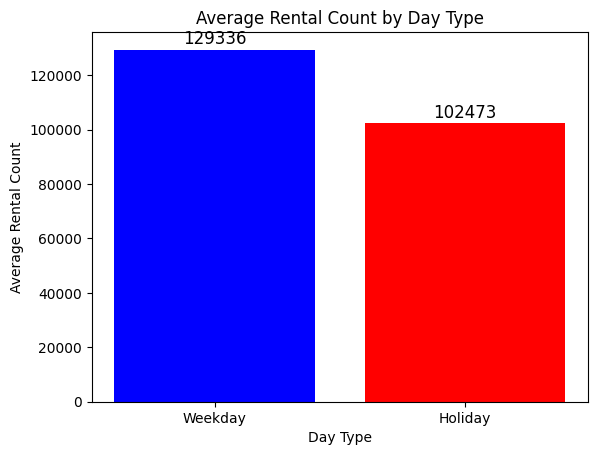

In [5]:
import matplotlib.pyplot as plt

# 막대 그래프 그리기
plt.bar(df['day_type'], df['avg_rental_count'], color=['blue', 'red'])

# 그래프 제목 및 축 레이블 설정
plt.title('Average Rental Count by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Average Rental Count')

# 값 표시
for i, value in enumerate(df['avg_rental_count']):
    plt.text(i, value + 2000, f'{value:.0f}', ha='center', fontsize=12)

# 그래프 출력
plt.show()
